In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.manifold import TSNE
from umap import UMAP

In [33]:
df = pd.read_csv('diamonds.csv')
df = df.drop('Unnamed: 0', axis=1)
target = 'price'
features = df.columns.drop(target)
catagorical = df.select_dtypes(include='object').columns
numerical = df.select_dtypes(include='number').columns  
# one hot encode catagorical data
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
encoder.fit(df[catagorical])
encoded = encoder.transform(df[catagorical])
print(encoded.shape)
# combine encoded and numerical data
X = np.concatenate([df[numerical], encoded], axis=1)
y = df[target]
# scale data
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=10000, test_size=0.2, random_state=42)
X

(53940, 20)


C:\Users\yuwan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0.00623701, 0.51388889, 0.23076923, ..., 0.        , 0.        ,
        0.        ],
       [0.002079  , 0.46666667, 0.34615385, ..., 0.        , 0.        ,
        0.        ],
       [0.00623701, 0.38611111, 0.42307692, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.1039501 , 0.55      , 0.32692308, ..., 0.        , 0.        ,
        0.        ],
       [0.13721414, 0.5       , 0.28846154, ..., 0.        , 0.        ,
        0.        ],
       [0.11434511, 0.53333333, 0.23076923, ..., 0.        , 0.        ,
        0.        ]])

In [34]:
tsn = TSNE(n_components=2, random_state=0)


X_2d = tsn.fit_transform(X)


# umap = UMAP(n_components=2, random_state=0)
# X_2d = umap.fit_transform(X)


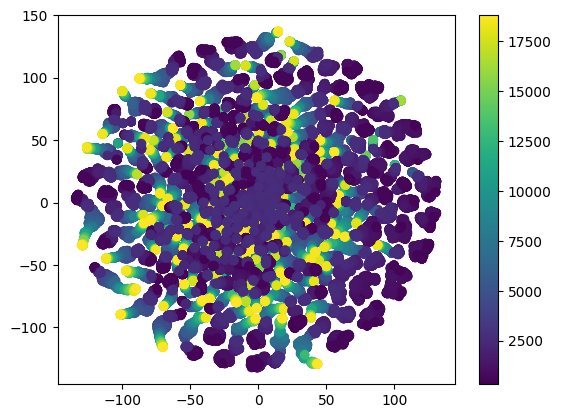

In [35]:
plt.scatter(X_2d[:,0], X_2d[:,1], c=y, cmap='viridis')
plt.colorbar()

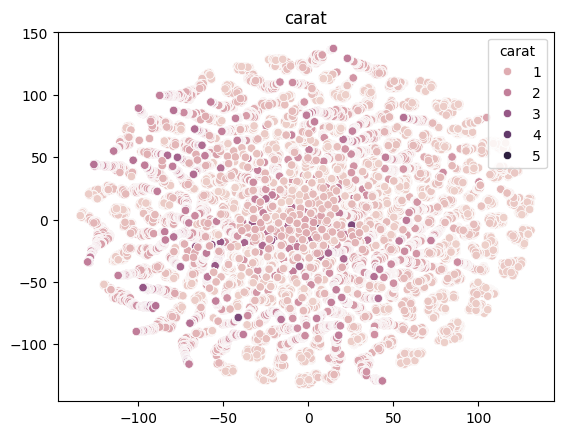

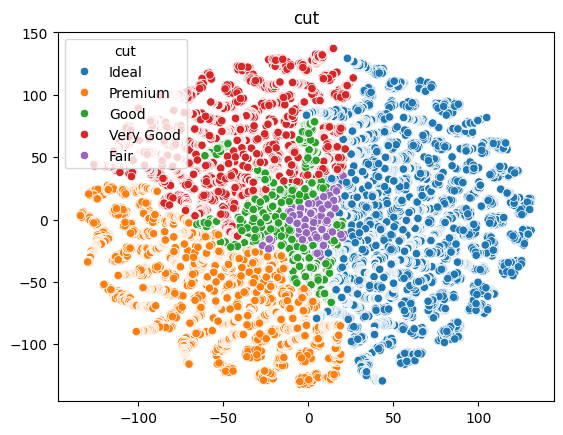

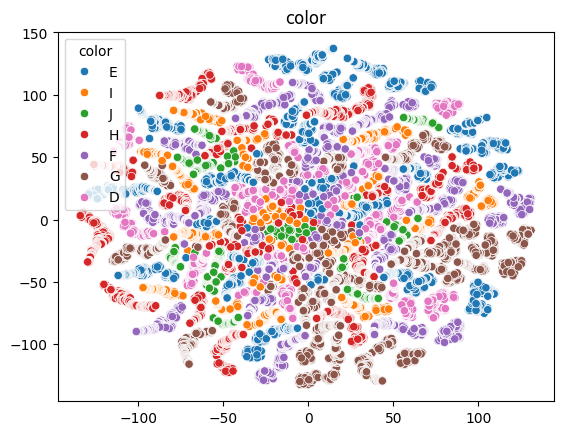

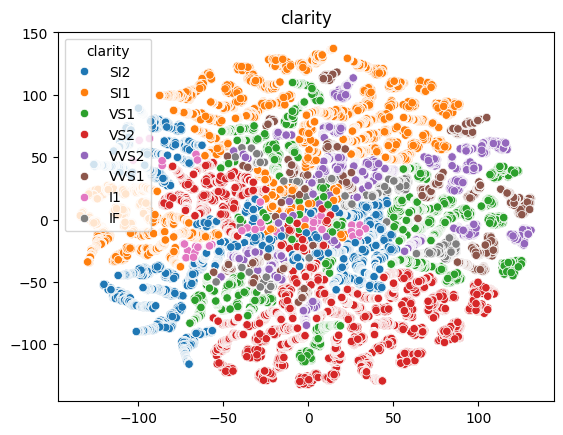

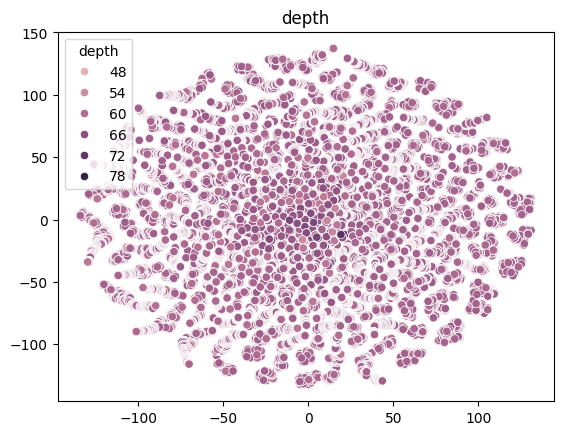

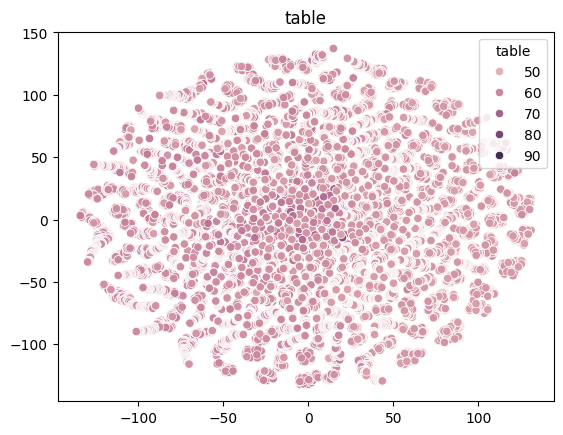

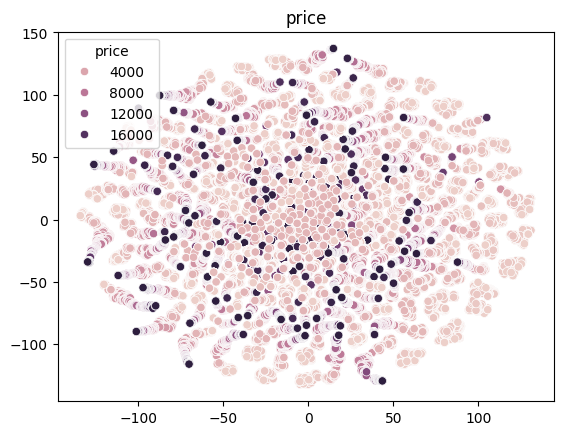

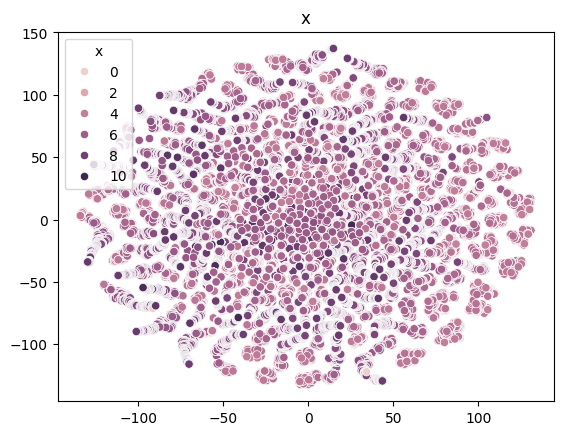

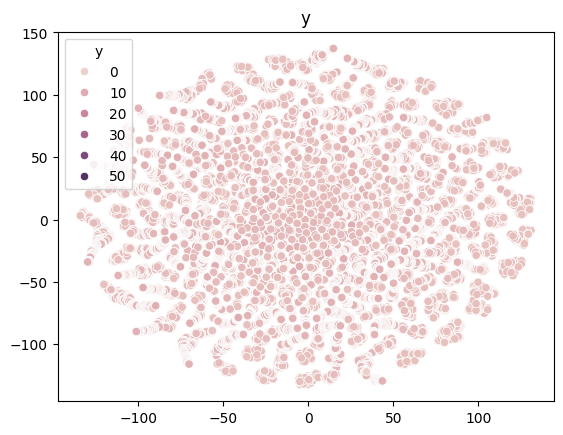

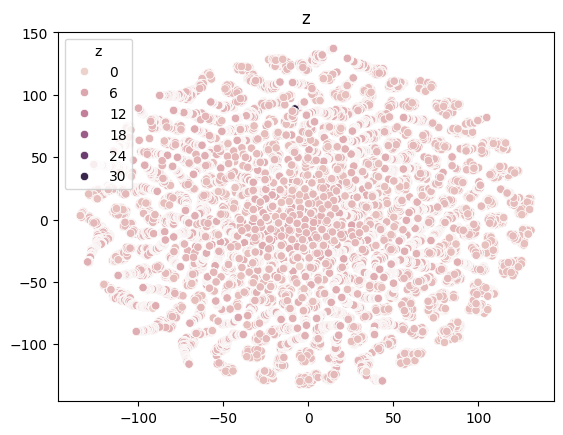

In [38]:
for col in df.columns:
    sns.scatterplot(x=X_2d[:,0], y=X_2d[:,1], hue=df[col], markers='.')
    # plt.colorbar()
    plt.title(col)
    plt.show()